In [160]:
#Combining plot styles
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [161]:
data = randn(100)

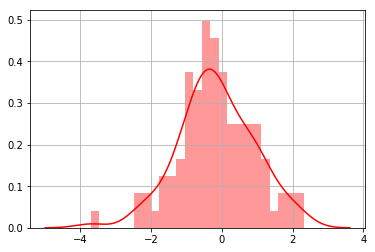

In [162]:
sns.distplot(data, bins = 25, color = 'r')                     #By default, 'bins' are set to 5
plt.grid(True)

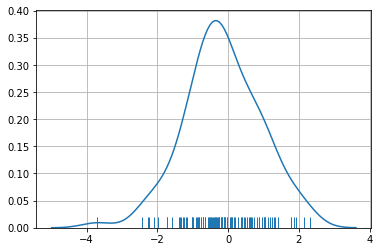

In [163]:
sns.distplot(data, bins = 25, rug = True, hist = False)                                     #Removing histogram, showing rugplot
plt.grid(True)

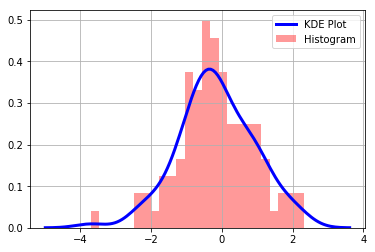

In [164]:
sns.distplot(data, bins = 25,
            kde_kws = {'color': 'blue', 'label': 'KDE Plot', 'linewidth': 3},      #Customising both plots individually
            hist_kws = {'color': 'red', 'label': 'Histogram'})
plt.grid(True)

In [165]:
from pandas import Series
sr1 = Series(data, name = 'Example')
sr1

0    -1.252970
1    -3.699935
2     0.385215
3    -0.722595
4     0.370766
5     1.873583
6    -0.575986
7    -0.995798
8    -1.353869
9    -0.485564
10    0.606076
11   -0.768066
12   -0.492982
13    0.441410
14    0.593451
15    1.299237
16   -0.814274
17    0.072283
18    1.194405
19    1.047334
20   -1.725789
21   -0.549688
22   -0.431561
23    1.045885
24   -1.727224
25   -0.119700
26    0.741505
27    0.185692
28   -2.230579
29   -0.184861
        ...   
70   -0.044087
71   -2.446253
72   -1.192534
73   -0.470642
74   -0.545610
75   -0.170694
76    2.134975
77   -0.019560
78    1.768032
79   -2.101099
80    1.404313
81   -0.668247
82   -1.981035
83    0.118507
84    0.609551
85   -1.014851
86   -0.333854
87   -0.854432
88    1.013049
89   -0.321373
90    0.526227
91    1.114851
92   -0.527051
93   -0.111383
94   -0.077959
95   -0.883584
96   -0.710464
97   -1.264390
98   -0.380346
99    0.168825
Name: Example, Length: 100, dtype: float64

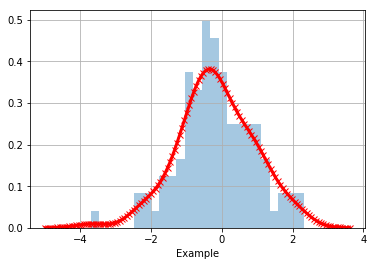

In [166]:
sns.distplot(sr1, bins = 25,
            kde_kws = {'color': 'red', 'linewidth': 3, 'marker': 'x'})                        #Seaborn works well with pandas
plt.grid(True)

In [167]:
data1 = randn(100)
data2 = randn(100) + 2                                     #'+ 2' offsets mean -> Variation

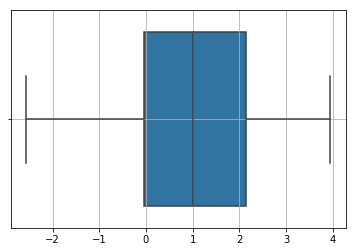

In [168]:
sns.boxplot([data1,data2])
plt.grid(True)

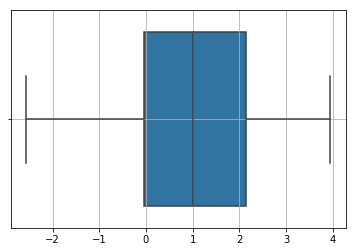

In [169]:
#Including outlier points, we can include those with the "whiskers"
sns.boxplot([data1,data2],whis=np.inf)
plt.grid(True)

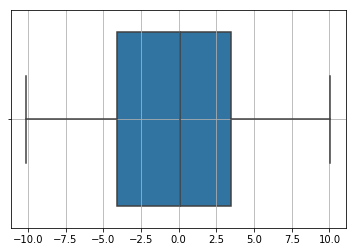

In [170]:
data1 = stats.norm(0,5).rvs(100)

#Two gamma distributions concatenated together (Second one is inverted)
data2 = np.concatenate([stats.gamma(5).rvs(50)-1,
                        -1*stats.gamma(5).rvs(50)])

#Box plot the data
sns.boxplot([data1,data2],whis=np.inf)
plt.grid(True)

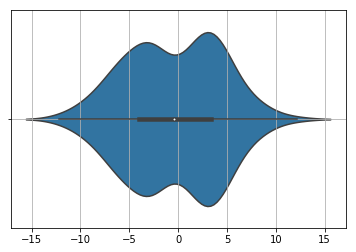

In [171]:
sns.violinplot([data5, data6])
plt.grid(True)

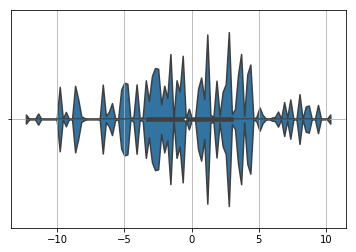

In [172]:
sns.violinplot(data5, bw = 0.01)
plt.grid(True)

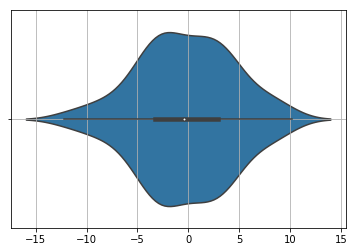

In [173]:
sns.violinplot(data5)
plt.grid(True)

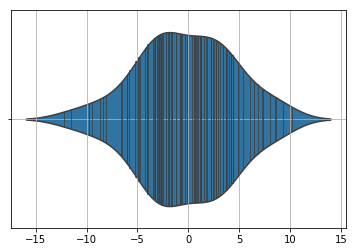

In [174]:
sns.violinplot(data5, inner = 'stick')                          #Bringing properties of a rugplot to a violin plot
plt.grid(True)

In [175]:
#Regression Plots (Linear & Local Regression)
tips = sns.load_dataset('tips')

In [176]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [177]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


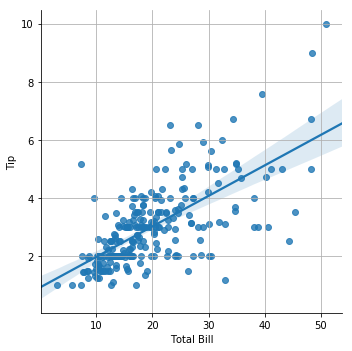

In [178]:
sns.lmplot('total_bill', 'tip', tips)                                          #'.lmplot' is used to plot linear relationships
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.grid(True)

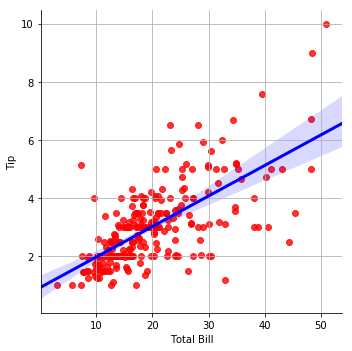

In [179]:
sns.lmplot('total_bill', 'tip', tips,
          scatter_kws = {'marker': 'o', 'color': 'r'},
          line_kws = {'linewidth': 3, 'color': 'blue'})
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.grid(True)

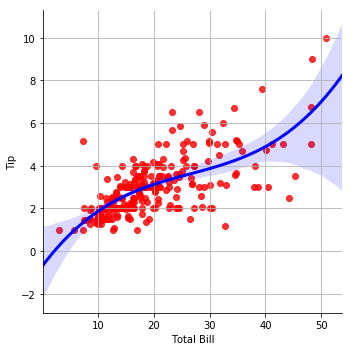

In [180]:
sns.lmplot('total_bill', 'tip', tips, order = 3,                   #'order = 4' indicates 4th order polynomial (Non-linear)
          scatter_kws = {'marker': 'o', 'color': 'r'},             #Order is similar to derivatives of functions
          line_kws = {'linewidth': 3, 'color': 'blue'})
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.grid(True)

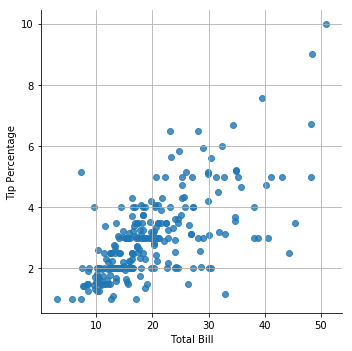

In [181]:
sns.lmplot('total_bill', 'tip', tips, fit_reg = False)            #Removing linear regression
plt.xlabel('Total Bill')
plt.ylabel('Tip Percentage')
plt.grid(True)

In [182]:
tips['tip_perc'] = 100*(tips['tip'] / tips['total_bill'])   #Percentage of total bill = tip
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_perc
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


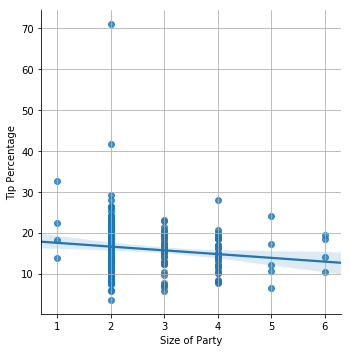

In [183]:
sns.lmplot('size', 'tip_perc', tips)                       #'size' = size of each party/group
plt.xlabel('Size of Party')                                #Party size of 4 has least variation (Shortest line)
plt.ylabel('Tip Percentage')
plt.grid(True)

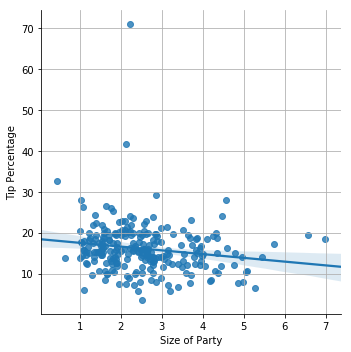

In [184]:
sns.lmplot('size', 'tip_perc', tips, x_jitter = 1)

import webbrowser
url = "http://en.wikipedia.org/wiki/Jitter"
webbrowser.open(url)

#Amount of jitter (only along the categorical axis) to apply. This can be useful when you have many points and they overlap, 
#so that it is easier to see the distribution. You can specify the amount of jitter (half the width of the uniform 
#random variable support), or just use True for a good default

plt.xlabel('Size of Party')
plt.ylabel('Tip Percentage')
plt.grid(True)

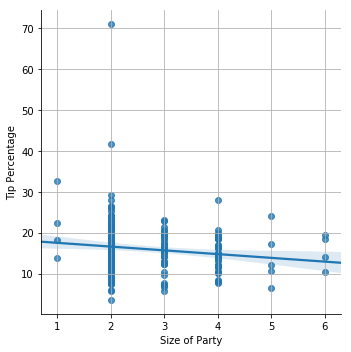

In [185]:
sns.lmplot('size', 'tip_perc', tips)                 #No 'jitter' applied
plt.xlabel('Size of Party')
plt.ylabel('Tip Percentage')
plt.grid(True)

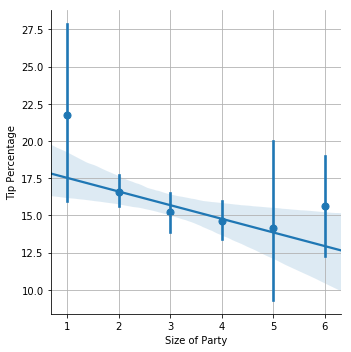

In [186]:
#Can also estimate the tendency of each bin (size of party in this case)
sns.lmplot('size', 'tip_perc', tips, x_estimator = np.mean)
plt.xlabel('Size of Party')                                      #Party of 2 has least variation (Shortest line)
plt.ylabel('Tip Percentage')
plt.grid(True)

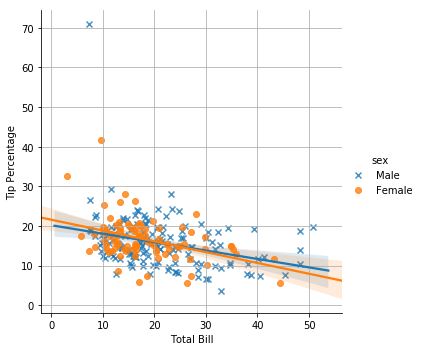

In [187]:
sns.lmplot('total_bill', 'tip_perc', tips, hue = 'sex', markers = ['x', 'o'])

#'hue, col, row' -> Variables that define subsets of the data, which will be drawn on separate facets in the grid.

plt.xlabel('Total Bill')
plt.ylabel('Tip Percentage')
plt.grid(True)

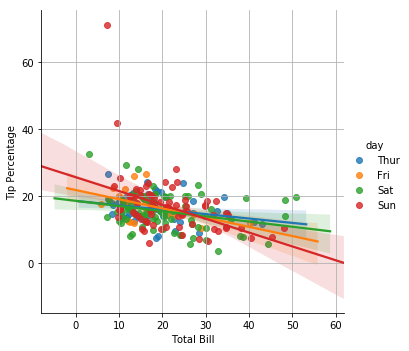

In [188]:
sns.lmplot('total_bill', 'tip_perc', tips, hue = 'day')
plt.xlabel('Total Bill')
plt.ylabel('Tip Percentage')
plt.grid(True)

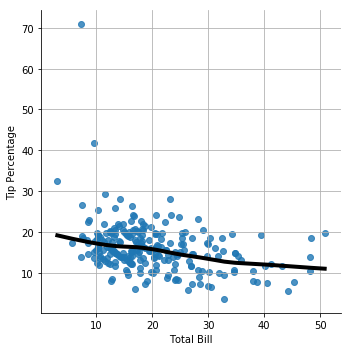

In [189]:
#Local Regression/Model Fitting
sns.lmplot('total_bill', 'tip_perc', tips, lowess = True, line_kws = {'color': 'black', 'linewidth': 4})

#'lowess' -> If True, use statsmodels to estimate a nonparametric lowess model (locally weighted linear regression)
# Note that confidence intervals cannot currently be drawn for this kind of model

plt.xlabel('Total Bill')
plt.ylabel('Tip Percentage')
plt.grid(True)

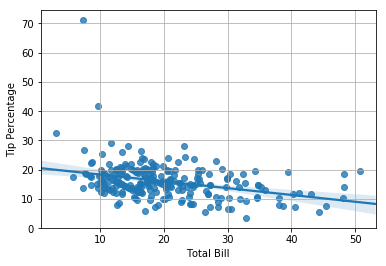

In [190]:
sns.regplot('total_bill', 'tip_perc', tips)
plt.xlabel('Total Bill')
plt.ylabel('Tip Percentage')
plt.grid(True)

In [198]:
#Creating a figure with 2 subplots
fig, (axis1,axis2) = plt.subplots(1,2,sharey =True)

sns.regplot("total_bill","tip_pect",tips,ax=axis1)
sns.violinplot(tips['tip_pect'],tips['size'],color='Reds_r',ax=axis2)          #Non-functional -> Expected error

In [192]:
#Heatmaps & Clustered Matrices
datafr = sns.load_dataset('flights')

In [193]:
datafr.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [194]:
datafr = datafr.pivot('month', 'year', 'passengers')                 #Pivoting makes dataset easier to manage
datafr

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


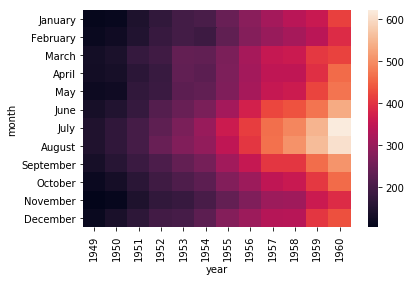

In [197]:
#Dataset is now in a clear format to be displayed as a heatmap
sns.heatmap(datafr)
#Seaborn will automatically try to pick the best color scheme for a dataset, whether it is a diverging or converging colormap

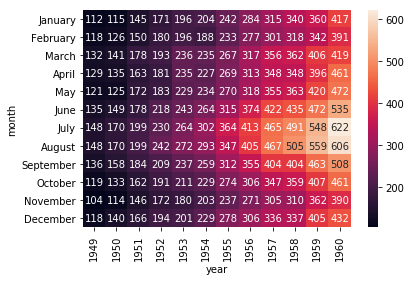

In [108]:
sns.heatmap(datafr, annot = True, fmt = 'd')                         
#Annotating each cell, 'fmt = 'd'' is used for formatting correctly

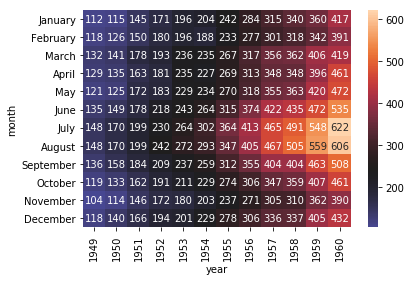

In [115]:
sns.heatmap(datafr, annot = True, fmt = 'd', center = datafr.loc['January', 1955])

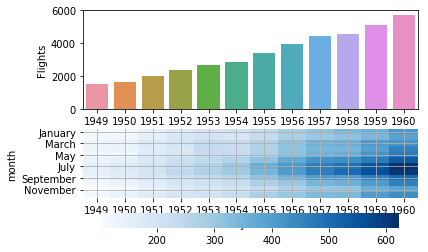

In [125]:
#heatmap() can be used on an axes for a subplot to create more informative figures
f, (axis1, axis2) = plt.subplots(2, 1)

yearly = datafr.sum()

#Since 'yearly' is an inefficient format, have to grab the desired values with a Series & then put them in a dframe
years = pd.Series(yearly.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly.values)
flights = pd.DataFrame(flights)

#Construct the dframe and name columns
yeardf = pd.concat((years, flights), axis = 1)
yeardf.columns = ['Year', 'Flights']

#Create the barplot above
sns.barplot('Year', y = 'Flights', data = yeardf, ax = axis1)
plt.grid(True)

#Create the heatmap below
sns.heatmap(datafr, cmap = 'Blues', ax = axis2, cbar_kws = {'orientation': 'horizontal'})       #'axis2' places below axis1
plt.grid(True)

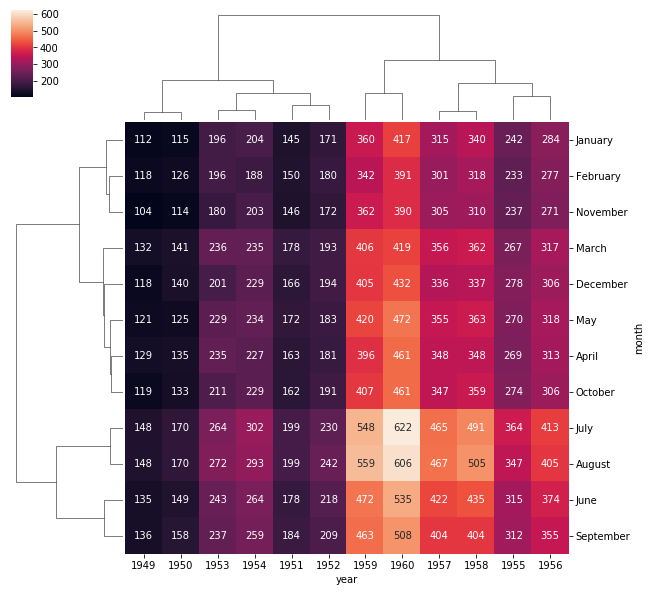

In [199]:
#ClusterMap (Similar rows next to each other)


#ALL THE FOLLOWING PLOTS SHOULD BE ANALYSED IN CONJUCTION WITH THE BARPLOT/HEATMAP PLOT ABOVE


sns.clustermap(datafr, annot = True, fmt = 'd')

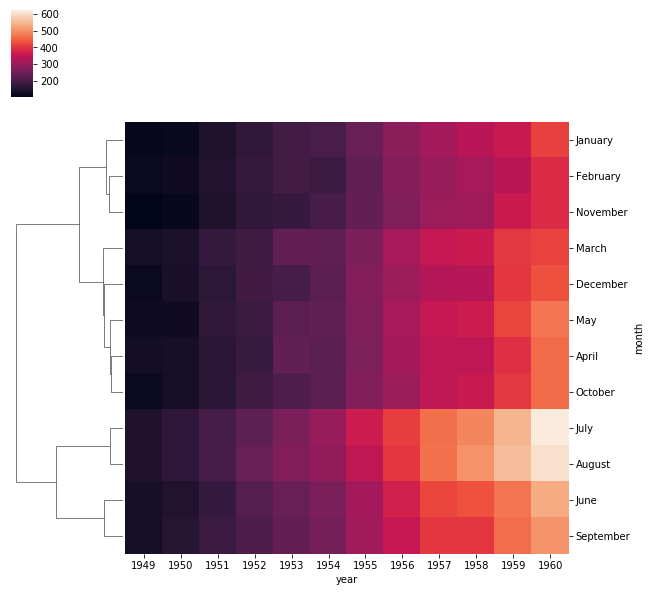

In [127]:
sns.clustermap(datafr, col_cluster = False)                            #Clustered by month only -> Unclustering the columns

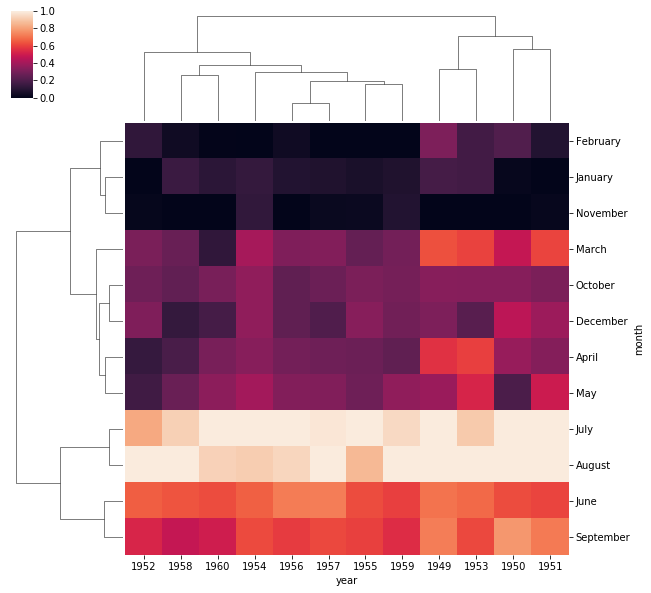

In [128]:
#As the number of flights increase every year, should set a standard scale
sns.clustermap(datafr, standard_scale = 1)                           #Standardised by columns -> Year (Horizontal)

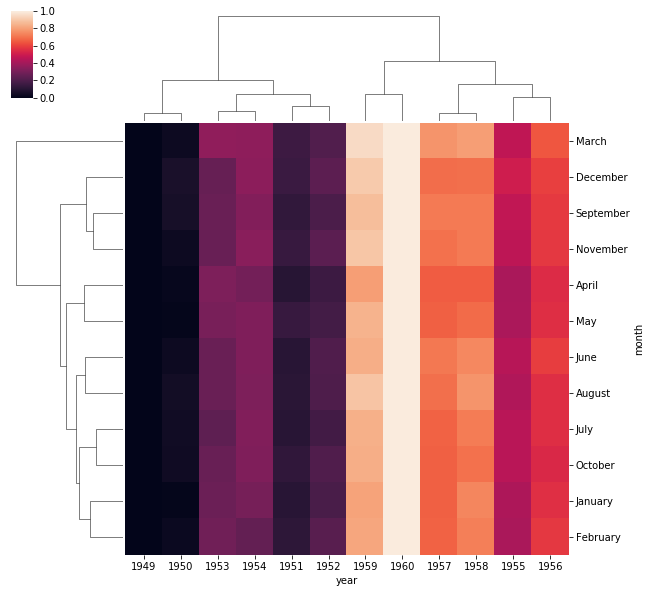

In [201]:
sns.clustermap(datafr, standard_scale = 0)                                  #Scaling the rows (Vertical)

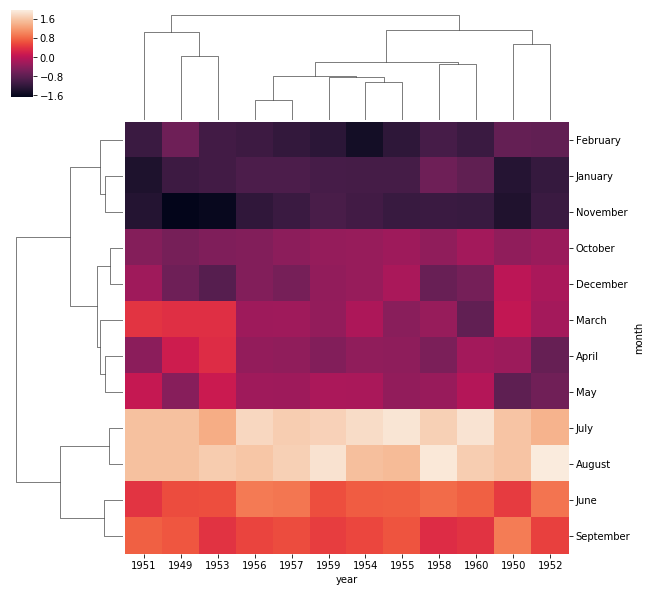

In [130]:
sns.clustermap(datafr, z_score = 1)                           
#'z_score' -> Subtracts the mean and divides by the STD of each column, then thh rows have a mean of 0 and a variance of 1
#We can then see (by viewing legend to the right) which values are greater than the mean and which are below very clearly